# XGI in 15 minutes

Hello! If you are new to XGI you might want to check out the [XGI in 1 minute](https://xgi.readthedocs.io/en/stable/api/tutorials/getting_started_1.html) or the [XGI in 5 minutes](https://xgi.readthedocs.io/en/stable/api/tutorials/getting_started_2.html) tutorials for a quick introduction.

The starting point is always to import our Python library and other standard libraries, this is simply done using:

In [24]:
import matplotlib.pyplot as plt

import xgi

## Uploading a dataset

In this tutorial we will construct a hypergraph describing real world data! With XGI we provide a companion data repository, [xgi-data](https://github.com/xgi-org/xgi-data), with which you can easely load several datasets in standard format:

In [25]:
H_enron = xgi.load_xgi_data("email-enron")

The 'email-enron' dataset, for example, has a corresponding [datasheet](https://github.com/xgi-org/xgi-data/blob/main/datasheets/email-enron/README_email-enron.md) explaining its characteristics. The nodes (individuals) in this dataset contain associated email addresses and the edges (emails) contain associated timestamps. These attributes can be accessed by simply typing `H.nodes[id]` or `H.edges[id]` respectively.

In [26]:
print(f"The hypergraph has {H_enron.num_nodes} nodes and {H_enron.num_edges} edges")

The hypergraph has 148 nodes and 10885 edges


We can also print a summary of the hypergraph:

In [27]:
print(H_enron)

Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


The dataset is completely formatted. You can access nodes and edges or their attributes in a very simple way:

In [28]:
print("The first 10 node IDs are:")
print(list(H_enron.nodes)[:10])
print("The first 10 edge IDs are:")
print(list(H_enron.edges)[:10])
print("The attributes of node '4' are")
print(H_enron.nodes["4"])
print("The attributes of edge '6' are")
print(H_enron.edges["6"])

The first 10 node IDs are:
['4', '1', '117', '129', '51', '41', '65', '107', '122', '29']
The first 10 edge IDs are:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
The attributes of node '4' are
{'name': 'robert.badeer@enron.com'}
The attributes of edge '6' are
{'timestamp': '2000-02-22T08:07:00'}


It is also possible to access nodes of edges in particular variable types, for example we can create a dictionary containing the edges of our hypergraph and their members:

In [29]:
edges_dictionary = H_enron.edges.members(dtype=dict)
print(list(edges_dictionary.items())[:5])

[('0', {'4', '1'}), ('1', {'117', '1', '129'}), ('2', {'1', '51'}), ('3', {'1', '51'}), ('4', {'41', '1'})]


## Cleaning up a hypergraph dataset

You can check if your hypergraph is connected using the function:

In [30]:
xgi.is_connected(H_enron)

False

We can count the number of isolated nodes and multi-edges in the following way:

In [31]:
isolated_nodes = H_enron.nodes.isolates()
print("Number of isolated nodes: ", len(isolated_nodes))
duplicated_edges = H_enron.edges.duplicates()
print("Number of duplicated edges: ", len(duplicated_edges))

Number of isolated nodes:  5
Number of duplicated edges:  9371


We can clean up this dataset to remove isolated nodes and multi-edges, and replace all IDs with integer IDs using the `cleanup` function:

In [32]:
H_enron_cleaned = H_enron.cleanup(
    multiedges=False, singletons=False, isolates=False, relabel=True, in_place=False
)

print(H_enron_cleaned)

Hypergraph named email-Enron with 143 nodes and 1459 hyperedges


We can see that 5 isolated nodes were removed and 9371 duplicated edges were removed. We can check it:

In [33]:
len(H_enron.nodes) == len(H_enron_cleaned.nodes) + len(isolated_nodes)

True

In [34]:
len(H_enron.edges) == len(H_enron_cleaned.edges) + len(duplicated_edges)

False

We can check that the hypergraph is now connected:

In [35]:
xgi.is_connected(H_enron_cleaned)

True

## Drawing

Visualization is crucial for understanding complex data structures. You can use the default drawing function:

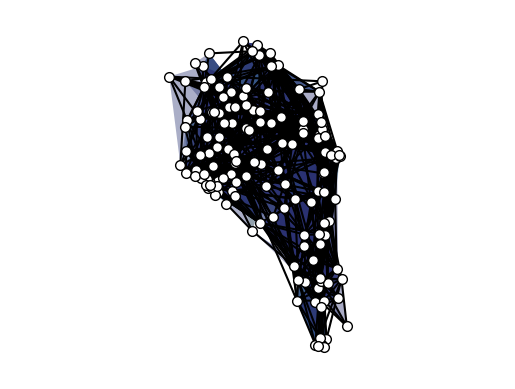

In [36]:
xgi.draw(H_enron_cleaned);

When dealing with large structures like this e-mail dataset the visualization can be cumberstome to interpret. To help you with that XGI provides options for plotting hypergraph using the features of nodes and edges, for example:

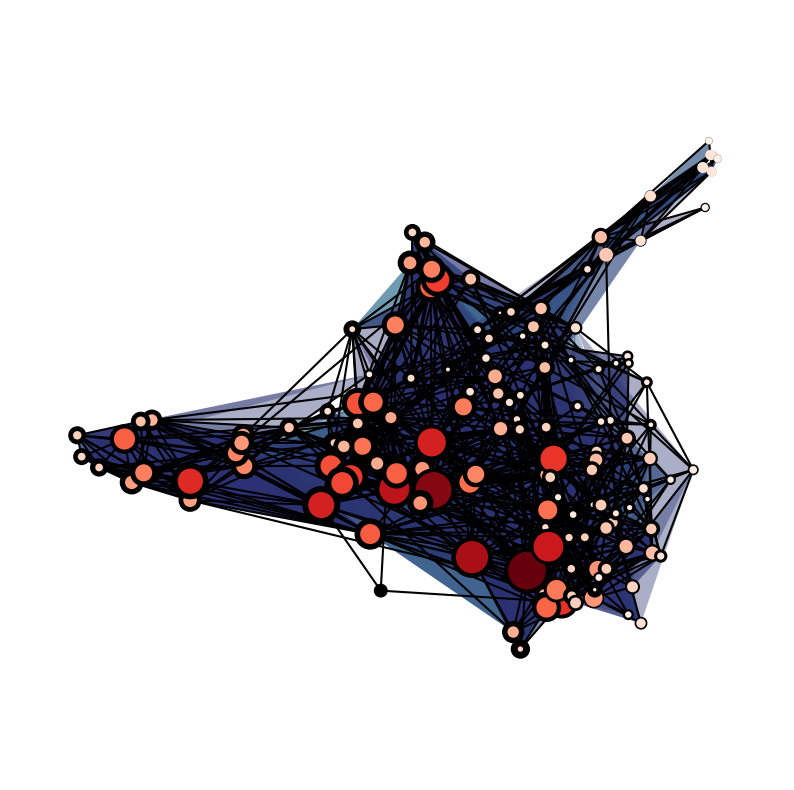

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
xgi.draw(
    H_enron_cleaned,
    node_size=H_enron_cleaned.nodes.degree,
    node_lw=H_enron_cleaned.nodes.average_neighbor_degree,
    node_fc=H_enron_cleaned.nodes.degree,
    ax=ax,
);

In this case we are plotting the hypergraph with the size and color of nodes depending on their degrees and the width of the edges nodes markers depending on their average neighbor degree.

## Histograms of edges sizes and nodes' degrees

It might me useful for a first analysis of you dataset to plot some histrograms representing relevant feautures of you higher-order structure. For example if you want to plot a histogram for the edges sizes:

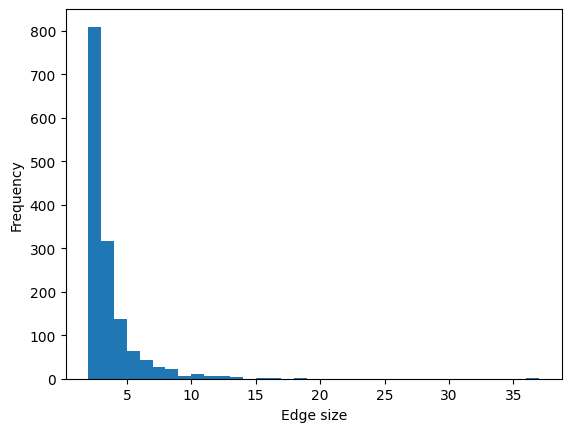

In [38]:
list_of_edges_sizes = H_enron_cleaned.edges.size.aslist()
ax = plt.subplot(111)
ax.hist(
    list_of_edges_sizes,
    bins=range(min(list_of_edges_sizes), max(list_of_edges_sizes) + 1, 1),
)
ax.set_xlabel("Edge size")
ax.set_ylabel("Frequency");

Or you can plot a histogram for the nodes' degrees (the degree of a node is the number of edges it belongs to):

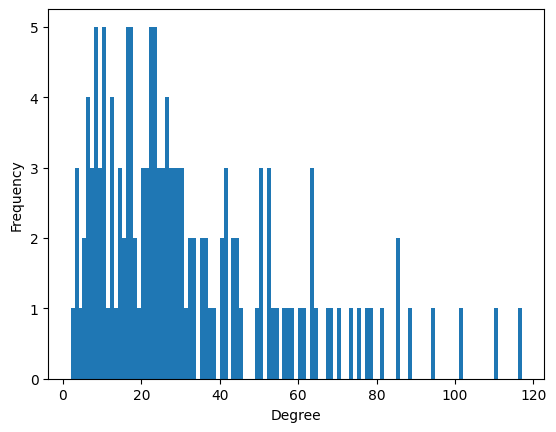

In [39]:
list_of_nodes_degrees = H_enron_cleaned.nodes.degree.aslist()
ax = plt.subplot(111)
ax.hist(
    list_of_nodes_degrees,
    bins=range(min(list_of_nodes_degrees), max(list_of_nodes_degrees) + 1, 1),
)
ax.set_xlabel("Degree")
ax.set_ylabel("Frequency");

## Incidence and Adjacency Matrices

Any hypergraph can be expressed as an $N \times M$ incidence matrix, $I$, where $N$ is the number of nodes and $M$ is the number of edges. Rows indicate the node ID and the columns indicate the edge ID. $I_{i,j}=1$ if node $i$ is a member of edge $j$ and zero otherwise. XGI allows you to access the incidence matrix in the following way:

In [40]:
I = xgi.incidence_matrix(H_enron_cleaned, sparse=False)

Then you can visualize it:

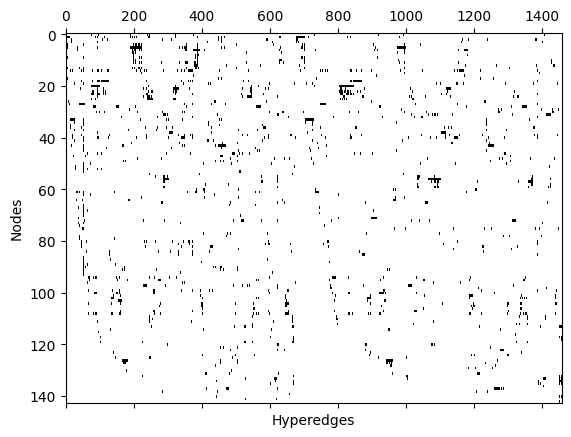

In [41]:
plt.spy(I, aspect="auto")
plt.xlabel("Hyperedges")
plt.ylabel("Nodes")
plt.show()

We can represent a hypergraph with an $N\times N$ adjacency matrix, $A$, where $N$ is the number of nodes. Notice that the adjacency matrix is a lossy format: different hypergraphs can create the same adjacency matrix. $A_{i,j} = 1$ if there is at least one hyperedge containing both nodes $i$ and $j$. XGI allows you to access the incidence matrix and visualize it in the following way:

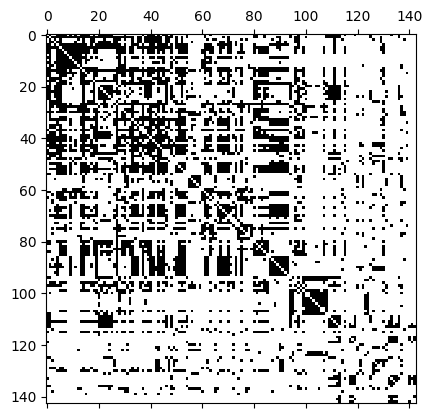

In [42]:
A = xgi.adjacency_matrix(H_enron_cleaned, sparse=False)
plt.spy(A);

If you are interested in other hypergraph matrices such as Laplacians, you can check the documentatation about the [linear algebra package](https://xgi.readthedocs.io/en/stable/api/linalg.html).

## Algorithms
The [algorithms package](https://xgi.readthedocs.io/en/stable/api/algorithms.html) contains different algorithms you can run on your higher-order structure. For example you can compute the density and degree assortativity of your structure:

In [43]:
print("The density of the hypergraph is:", xgi.density(H_enron_cleaned))
print(
    "The assortativity of the hypergraph is:", xgi.degree_assortativity(H_enron_cleaned)
)

The density of the hypergraph is: 1.3084764540479412e-40
The assortativity of the hypergraph is: 0.19079161924112412


Or you can access a dictionary containing the local clustering coefficient (overlap of the edges connected to a given node, normalized by the size of the node’s neighborhood, for more details you can see [this paper](https://arxiv.org/abs/0802.2512)) of your structures:

In [44]:
local_clustering_dict = xgi.local_clustering_coefficient(H_enron_cleaned)
print(local_clustering_dict)

{0: 0.6112820852842796, 1: 0.6339562501152698, 2: 0.5837947373260839, 3: 0.6270767577062006, 4: 0.6497241898978037, 5: 0.6883028005666035, 6: 0.7179414488945046, 7: 0.5888506735657011, 8: 0.4407894736842105, 9: 0.6371499962535367, 10: 0.5050316490232456, 11: 0.6948362161100078, 12: 0.5376442220598063, 13: 0.664016042014978, 14: 0.7624893307053918, 15: 0.497096150343852, 16: 0.5910577243910577, 17: 0.634900381721316, 18: 0.766068236413062, 19: 0.6477387500991035, 20: 0.6690373322537638, 21: 0.6939042793534276, 22: 0.7150213237411382, 23: 0.7253351022853525, 24: 0.5731174220962014, 25: 0.7200429707439118, 26: 0.6174282057811469, 27: 0.6241125385660331, 28: 0.4005992715737551, 29: 0.5194849584118213, 30: 0.526652998109372, 31: 0.5844262531858526, 32: 0.5939397597517252, 33: 0.6858414113751181, 34: 0.507683862031688, 35: 0.5562193576874984, 36: 0.7702243211334115, 37: 0.576778940186673, 38: 0.6533890357032772, 39: 0.7565836877802451, 40: 0.6918456352561674, 41: 0.5647748459257745, 42: 0.59

## Stats
The stats package is one of the features that sets XGI apart from other libraries. It provides a common interface to all statistics that can be computed from a network, its nodes, or edges.
This package allows you, for example, to filter the nodes of a hypergraph with a certain degree:

In [45]:
nodes_degree_2 = H_enron_cleaned.nodes.filterby("degree", 20)
print(nodes_degree_2)

[8, 58, 123]


Or you can perform more complex tasks such as creating a dataframe containing different statistics:

In [46]:
df = H_enron_cleaned.nodes.multi(["degree", "clustering_coefficient"]).aspandas()
print(df)

     degree  clustering_coefficient
0        44                0.548792
1       101                0.452685
2        57                0.529268
3        36                0.606272
4        50                0.569712
..      ...                     ...
138       8                0.535714
139       6                0.333333
140       4                1.000000
141       6                1.000000
142       6                1.000000

[143 rows x 2 columns]


You can learn more about the stats package with the [focus tutorial on statistics](https://xgi.readthedocs.io/en/stable/api/tutorials/focus_6.html) or checking the [documentation](https://xgi.readthedocs.io/en/stable/api/stats.html).

## Wrapping Up

Well done! 👏 You've covered a lot in just 15 minutes with XGI. We hope you enjoyed this tutorial, and there's much more to explore! Check out other tutorials [here](https://xgi.readthedocs.io/en/latest/user_guides.html)!